# ======Mid term examination with data collection======
## ----Enterprises' related stock data & news collection program----
### 20195015 김단을

## CAUTION BEFORE EXECUTING THIS PROGRAM

이 프로그램을 실행하시기 전에 다음 패키지들이 설치되었는 지 확인해 주세요!

- BeautifulSoup (install with 'pip install bs4')
- selenium (install with 'pip install selenium')
- pandas (install with 'pip install pandas')
- urllib (install with 'urllib')
- matplotlib (install with 'pip install python-matplotlib')
- open cv (install with 'pip install opencv-contrib-python')
- numpy (install with 'pip install numpy')

### 아래 항목부터 프로그램 실행 입니다. 쉬프트-엔터 키를 통해 실행하시고, save_path(default parental saving path on your computer)와 path (chromedriver path)를 실행하는 컴퓨터의 환경에 맞게 변경해주세요

## 0. Importing necessary packages

In [245]:
from bs4 import BeautifulSoup
from selenium import webdriver
import pandas as pd
import time
import os
import urllib
import matplotlib.pyplot as plt
import cv2
import xlsxwriter
import openpyxl
import numpy as np
from openpyxl import load_workbook

## Setting the directory to save, 나중에 검색어와 합쳐져서 저장 경로를 새롭게 생성 예정, 일단 여기서는 default라고 이름을 설정해 놓음

start = time.time() ## Measuring the time for program execution period -- start
now = time.localtime()
text1 = 'default'
text2 = '_saved_at_%04d_%02d_%02d_%02d_%02d' %(now.tm_year, now.tm_mon, now.tm_mday, now.tm_hour, now.tm_min)
save_path = '/Users/carpe.dkm/Documents/midterm/' # THIS SHOULD BE ADJUSTED BASED ON YOUR COMPUTER SETTINGS

try:
    os.mkdir(save_path)
except FileExistsError:
    print('File already existing, continuing')
    pass

## Making the pandas dataframe

market_value_pd = pd.DataFrame()
market_status_pd = pd.DataFrame()

File already existing, continuing


In [246]:
path = '/home/carpedkm/Documents/TA_automation/chromedriver_240' # THIS SHOULD BE ADJUSTED BASED ON YOUR COMPUTER SETTINGS

In [247]:
driver = webdriver.Chrome(path)

## 1. Getting the stock code of the company from Google search

In [248]:
### FIRST GET THE CODE FOR THE COMPANY FROM GOOGLE, and SET THE FILE NAME TO SAVE
driver.get('https://google.com')
keyword = input('1. Input keyword to search(Example: Apple, Microsoft, Google, Samsung, Amazon, Tesla): ')

### Input for directory name
ft_name = input("2. FILE NAME TO SAVE NEWS SUMMARY(Ex. news.txt): ")

fx_name = input("3. FILE NAME TO SAVE EXCEL FILE(Ex. company_data.xlsx): ")

fc_name = input("4. FILE NAME TO SAVE CSV FILE related to news(Ex. company_news.csv): ")

fc_v_name = input("5. FILE NAME TO SAVE CSV FILE related to value data(Ex. company_value.csv): ")


### SEARCH
origin = keyword
keyword = keyword + ' stock code'

## Find by putting in the keyword with the stock code, and gain the code
em = driver.find_element_by_xpath('//*[@id="tsf"]/div[2]/div[1]/div[1]/div/div[2]/input')
em.send_keys(keyword)
time.sleep(3)
driver.find_element_by_class_name('gNO89b').click()
time.sleep(3)
## Parsing the page source to find the stock code
source = driver.page_source
source_text = BeautifulSoup(source, 'html.parser')
company_code = source_text.find('div', class_='HfMth')
company_code = company_code.text.strip()
time.sleep(1)
## String tokenizing to gain the code
company_code = company_code.split(':')[1].strip()
print("Searching initiated for '" + company_code + "'")
time.sleep(0.5)

print('--------Code execution of step 1 completed--------')

1. Input keyword to search(Example: Apple, Microsoft, Google, Samsung, Amazon, Tesla): Google
2. FILE NAME TO SAVE NEWS SUMMARY(Ex. news.txt): news.txt
3. FILE NAME TO SAVE EXCEL FILE(Ex. company_data.xlsx): company_data.xlsx
4. FILE NAME TO SAVE CSV FILE related to news(Ex. company_news.csv): company_news.csv
5. FILE NAME TO SAVE CSV FILE related to value data(Ex. company_value.csv): company_value.csv
Searching initiated for 'GOOGL'
--------Code execution of step 1 completed--------


## *Auxiliary Step to get the company related images from google. It would later be used to make plt figure

Saving the photoes collected to Google_saved_at_2020_11_04_20_40
Image Tag Collected for Google stock code
>> No.  0  img tag part of the image
<selenium.webdriver.remote.webelement.WebElement (session="5cdcc3354b66b6c91f5409b45b1d91f5", element="0.6015495964648103-1")>
>>>> DATA-SRC or SRC

>> No.  1  img tag part of the image
<selenium.webdriver.remote.webelement.WebElement (session="5cdcc3354b66b6c91f5409b45b1d91f5", element="0.6015495964648103-2")>
>>>> DATA-SRC or SRC

>> No.  2  img tag part of the image
<selenium.webdriver.remote.webelement.WebElement (session="5cdcc3354b66b6c91f5409b45b1d91f5", element="0.6015495964648103-3")>
>>>> DATA-SRC or SRC

>> No.  3  img tag part of the image
<selenium.webdriver.remote.webelement.WebElement (session="5cdcc3354b66b6c91f5409b45b1d91f5", element="0.6015495964648103-4")>
>>>> DATA-SRC or SRC

>> No.  4  img tag part of the image
<selenium.webdriver.remote.webelement.WebElement (session="5cdcc3354b66b6c91f5409b45b1d91f5", element="0.6015495
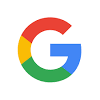
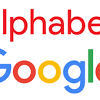
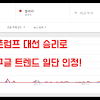
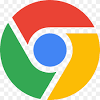
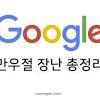
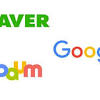
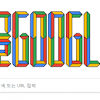
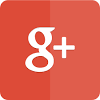
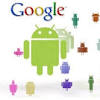
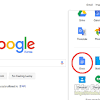
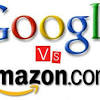
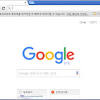
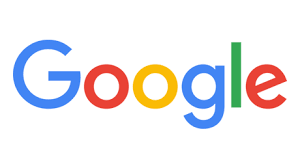
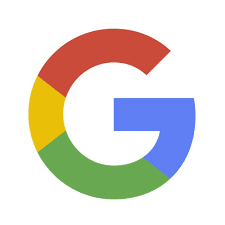
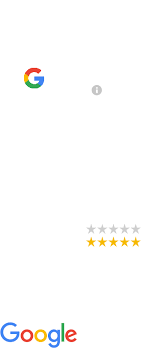
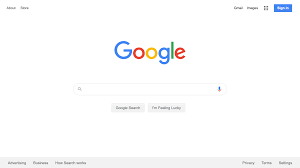
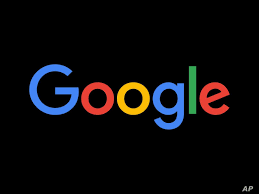
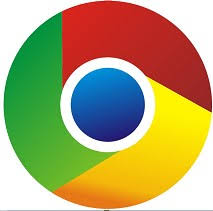
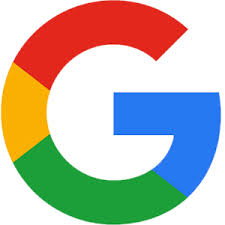
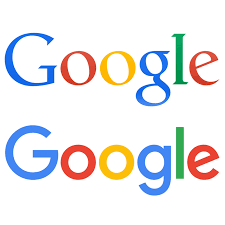
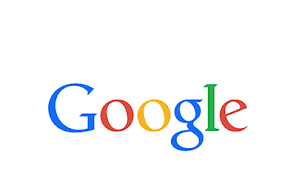
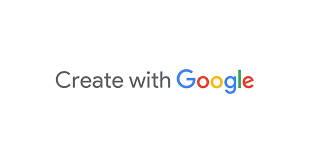
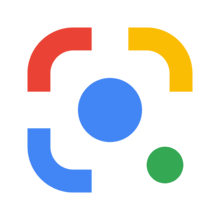
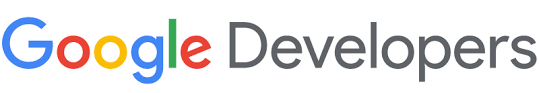
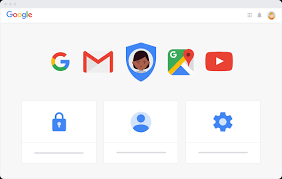
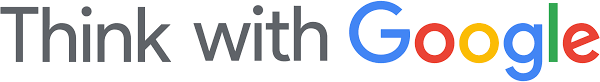
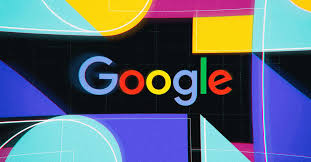
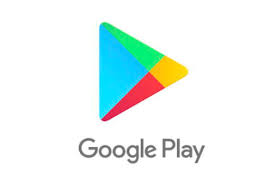
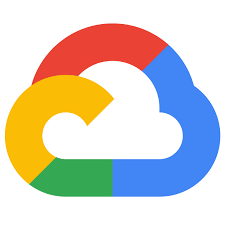
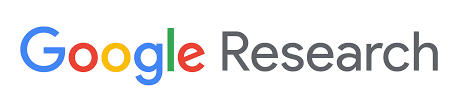
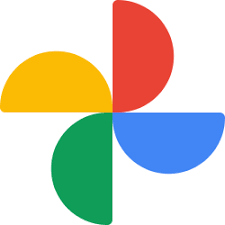
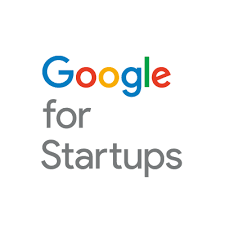

In [249]:
### Auxiliary step : Getting the company logo photo from google

os.chdir(save_path)
text1 = origin
dir_name = text1 + text2
print("Saving the photoes collected to " + dir_name)
save_path = save_path + dir_name
os.makedirs(save_path)
os.chdir(save_path)
text_save_path = save_path + '/' + ft_name
xlsx_save_path = save_path + '/' + fx_name
csv_news_save_path = save_path + '/' + fc_name
csv_value_save_path = save_path + '/' + fc_v_name

def scrollDown(driver): # Code to scroll down
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(1)

def imgSrcChk(): # Code to gather the images from google image search
    
    final_img_src = []
    count = 0
    driver.get('https://www.google.co.kr/imghp?hl=ko')
    em = driver.find_element_by_xpath('//*[@id="sbtc"]/div/div[2]/input') # input
    em.send_keys(origin) # send the keyword to search
    time.sleep(1) # wait
    driver.find_element_by_class_name('Tg7LZd').click() # click search
    time.sleep(3)
    # Scrolling down to gain enough image data
    scrollDown(driver);
    scrollDown(driver);
    scrollDown(driver);
    source_temp = driver.page_source
    source_text_temp = BeautifulSoup(source_temp, 'html.parser')
    imgs = driver.find_elements_by_tag_name('img')
    print('Image Tag Collected for ' + keyword)
    for img in imgs:
        print(">> No. ", count, " img tag part of the image")
        print(img)
        
        img_src_test = img.get_attribute('data-src')
        if not img_src_test : 
            img_src_test = img.get_attribute('src')
   
        print('>>>> DATA-SRC or SRC')
        print(img_src_test)
        
        count += 1
        final_img_src.append(img_src_test)
    
    file_no = 1
    
    for i in range(0, 10):
        try:
            urllib.request.urlretrieve(final_img_src[i], str(file_no) + '.jpg')
            print('Img file related to %s had been saved with index %d with %s.jpg' %(keyword, file_no, file_no))
        except TypeError:
            print("Trial for image file saving failed, hence in status NONE" %(i))
            continue
        time.sleep(1)
        print('='*100)
        file_no += 1
        
## Executing the code differing by company code since, xpath of google is different
if(company_code == 'GOOG' or company_code == 'GOOGL' or company_code == 'AAPL' or company_code == 'MSFT' or company_code == '005930' or company_code == 'AMZN' or company_code == 'TSLA'):
    imgSrcChk()
    print('IMAGE FILE SAVING COMPLETED')
else:
    print("Logo Search Not supported for '" + company_code + "'" + " currently. Code update in need")

time.sleep(1)

## --------FROM HERE, code might work slow, please wait for the code to run --------
#### (Program executes after the loading of each webpage is complete:: which means that the circle rotating on the tab of the chromebrowser should be stopped in order for the program to be executed)
#### Chrome might take some time loading the finance.yahoo.com

## 2. Searching the company financial data from yahoo finance

In [250]:
### SECOND, CODE FOR SEARCHING COMPANY STOCK CHART FROM YAHOO FINANCE (This had been written with yahoo finance, since our school blocks all the other stock sites)
# CAUTION :: CODE might be slow, hence you should wait a little bit
time.sleep(2.5)

driver.get('https://finance.yahoo.com')
time.sleep(1)
em = driver.find_element_by_xpath('//*[@id="yfin-usr-qry"]')
time.sleep(0.25)
em.send_keys(company_code)
time.sleep(0.5)
driver.find_element_by_id('header-desktop-search-button').click()
time.sleep(1)
print('--------Code execution of step 2 completed--------')

--------Code execution of step 2 completed--------


## 3. Collect the data from yahoo finance

In [251]:
### THIRD, Collect stock data from yahoo finance
# CAUTION :: CODE might be slow, hence you should wait a little bit, by your internet connection
full_page = driver.page_source
time.sleep(0.5)
soup_company = BeautifulSoup(full_page, 'html.parser')
company_info1 = soup_company.find('table', class_="W(100%)")
# type(company_info)
chart1 = company_info1.find_all('tr')
titles = []
numbers = []
for i, content in enumerate(chart1): # left chart of the summary
    title = content.find('td', class_='C($primaryColor) W(51%)').text.strip()
    titles.append(title)
    print(title)
    print('-'*30)
    number = content.find('td', class_='Ta(end) Fw(600) Lh(14px)').text.strip()
    numbers.append(number)
    print(number)
    print('='*30)
company_info2 = soup_company.find('table', class_="W(100%) M(0) Bdcl(c)")
chart2 = company_info2.find_all('tr')
for i, content in enumerate(chart2): # right chart of the summary
    title = content.find('td', class_='C($primaryColor) W(51%)').text.strip()
    titles.append(title)
    print(title)
    print('-'*30)
    number = content.find('td', class_='Ta(end) Fw(600) Lh(14px)').text.strip()
    numbers.append(number)
    print(number)
    print('='*30)
print('--------Code execution of step 3 completed--------')

Previous Close
------------------------------
1,624.32
Open
------------------------------
1,630.76
Bid
------------------------------
1,673.00 x 1100
Ask
------------------------------
1,693.00 x 1100
Day's Range
------------------------------
1,612.11 - 1,659.00
52 Week Range
------------------------------
1,008.87 - 1,726.10
Volume
------------------------------
1,440,330
Avg. Volume
------------------------------
1,796,724
Market Cap
------------------------------
1.115T
Beta (5Y Monthly)
------------------------------
1.11
PE Ratio (TTM)
------------------------------
31.80
EPS (TTM)
------------------------------
51.75
Earnings Date
------------------------------
Jan 31, 2021 - Feb 04, 2021
Forward Dividend & Yield
------------------------------
N/A (N/A)
Ex-Dividend Date
------------------------------
N/A
1y Target Est
------------------------------
1,867.27
--------Code execution of step 3 completed--------


## 4. Collecting the news related to the company we are searching for

In [252]:
### FOURTH, CODE FOR COLLECTING THE NEWS RELATED TO THE COMPANY WE ARE SEARCHING FOR
news_contents = soup_company.find_all('li', class_='js-stream-content')
news_titles = []
news_summaries = []
# print(news_contents)
for i, content in enumerate(news_contents):
    print('>>NO. %d -- NEWS SUMMARY --'%(i+1))
   #NEWS TITLE
    news_title = content.find('a').text.strip()
    
    if news_title == '': # If the given data has no title, then it would save the information as 'No Title'
        news_titles.append('No Title')
        news_title = 'No Title'
    else:
        news_titles.append(news_title)
   #NEWS SUMMARY
    news_summary = content.find('p').text.strip()
    news_summaries.append(news_summary)
    
    #OUTPUT OF NEWS TITLE AND SUMMARY TO CLI
    print('TITLE : ', news_title)
    print('SUMMARY : ', news_summary)
    print('='*50)
print('*'*50)
print('NEWS COLLECTION COMPLETED')
print('--------Code execution of step 4 completed--------')

>>NO. 1 -- NEWS SUMMARY --
TITLE :  Waymo pauses operations in San Francisco, stays the course in Phoenix on Election Day
SUMMARY :  Waymo  has taken a dual approach to operations on Election Day.  In San Francisco, where Waymo has been testing its autonomous vehicles, driving operations have been temporarily suspended Tuesday and Wednesday "out of an abundance of caution."  Its fleet of autonomous vehicles was moved Monday to nearby Mountain View, according to an internal email first reported by The Verge.
>>NO. 2 -- NEWS SUMMARY --
TITLE :  No Title
SUMMARY :  Powder Maker for limestone, calcium carbonate, gypsum etc. Not pollute, Professional Team, Chat Support Available.
>>NO. 3 -- NEWS SUMMARY --
TITLE :  30 Stocks And ETFs To Watch After 2020 Election Day
SUMMARY :  After the 2020 presidential election, traders and investors will likely turn to sectors that are favored by the winning candidate. Over the last week, Benzinga has shared stocks and ETFs to watch across several sector

## 5. Saving to the pandas dataframe

In [253]:
### FIFTH, SAVE TO PANDAS DATAFRAME
cnt = 0
market_value_pd['Title'] = news_titles
market_value_pd['Summary'] = news_summaries
market_status_pd['Title'] = titles
market_status_pd['Details($)'] = numbers
print('--------Code execution of step 5 completed--------')

--------Code execution of step 5 completed--------


## 6. See what is collected (the image files collected from auxiliary step, pandas tables)

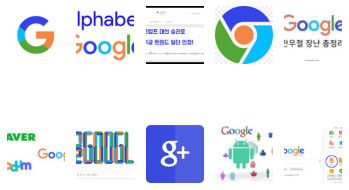

--------Code execution of step 6 completed--------


In [254]:
### SIXTH, SEE WHAT IS COLLECTED
# first, the image files related to the company
fig = plt.figure()
rows = 2
columns = 5
for i in range(1, 11):
    temp_path = save_path + '/' + str(i) + '.jpg'
    img = cv2.imread(temp_path)
    tmp = fig.add_subplot(rows, columns, i)
    tmp.imshow(img)
    tmp.axis('off')
plt.show()

## Temporary save the file to computer (Will use this figure to create excel file later)
fig.savefig('temp.png')
plt.close()
print('--------Code execution of step 6 completed--------')

In [255]:
market_value_pd # Second, To See the Pandas dataframe table

,Title,Summary
0,"Waymo pauses operations in San Francisco, stay...",Waymo has taken a dual approach to operations...
1,No Title,"Powder Maker for limestone, calcium carbonate,..."
2,30 Stocks And ETFs To Watch After 2020 Electio...,"After the 2020 presidential election, traders ..."
3,Waymo to temporarily suspend driving operation...,"""Out of an abundance of caution and with the s..."
4,YouTube Accounts Livestream Fake Election Resu...,(Bloomberg) -- Several YouTube accounts livest...
5,FAANG Stocks Among Leading Gainers On Election...,Tech stocks were among leading gainers on the ...
6,"Top Research Reports for Alphabet, Johnson & J...","Top Research Reports for Alphabet, Johnson & J..."
7,Can Yandex Weather a Second Wave of COVID-19 I...,Yandex's (NASDAQ: YNDX) stock recently dipped ...
8,It's Past Time for Microsoft to Disclose Azure...,It's been over five years since Amazon.com (NA...
9,"Besides Alphabet, Big Tech Failed To Impress",Investors are busy digesting big tech earnings...


In [256]:
market_status_pd # Second, To See the Pandas dataframe table

,Title,Details($)
0,Previous Close,"1,624.32"
1,Open,"1,630.76"
2,Bid,"1,673.00 x 1100"
3,Ask,"1,693.00 x 1100"
4,Day's Range,"1,612.11 - 1,659.00"
5,52 Week Range,"1,008.87 - 1,726.10"
6,Volume,"1,440,330"
7,Avg. Volume,"1,796,724"
8,Market Cap,1.115T
9,Beta (5Y Monthly),1.11


## 7. Saving the file to txt file(News titles and summaries) and to xlsx file(plt image figure, stock financial data, with news collected)

In [257]:
f = open(text_save_path, 'a')
##NEWS SAVING
count = 1
for i, j in zip(news_titles, news_summaries):
    f.write("NO. " + str(count))
    a = '\n-----\n'
    f.write(a)
    f.write(i)
    f.write('\n')
    f.write('-'*40)
    f.write('\n')
    f.write(j)
    f.write('\n')
    f.write('='*40)
    f.write('\n')
    count += 1
f.close()

## CREATING EXCEL FILE

# writer = xlsxwriter.Workbook(xlsx_save_path)
# writer_pd = pd.ExcelWriter(xlsx_save_path, engine='xlsxwriter')
# worksheet = writer.add_worksheet()
# worksheet.write('A1', origin)
# worksheet.set_column('B:B', 30)
# worksheet.set_column('F:F', 30)
# worksheet.set_column('G:G', 30)
# worksheet.insert_image('A3', 'temp.png', {'x_offset' : 15, 'y_offset' : 10})
# market_status_pd.to_excel(writer_pd, sheet_name='sheet1', startrow=3, startcol=1, encoding='utf-8')
# market_value_pd.to_excel(writer_pd, sheet_name='sheet1', startrow=3, startcol=5, encoding='utf-8')
# writer.close()
# writer_pd.close()
# # workbook = xlsxwriter.Workbook(xlsx_save_path)
# # worksheet = workbook.add_worksheet()

# # worksheet.write('A1', origin)
# # worksheet.set_column('A:A', 30)
# # worksheet.insert_image("B2", 'temp.png')
# # workbook.close()

# import openpyxl

wb = openpyxl.Workbook()
ws = wb.worksheets[0]
ws.title = 'Company related Images'
img = openpyxl.drawing.image.Image('temp.png')
img.anchor = 'A1'
ws.add_image(img)
wb.save(xlsx_save_path)

book = load_workbook(xlsx_save_path)
writer = pd.ExcelWriter(xlsx_save_path, engine='openpyxl')
writer.book = book

market_status_pd.to_excel(writer, sheet_name = 'Company status', startcol=2)
market_value_pd.to_excel(writer, sheet_name = 'Company related news', startcol=2)

writer.save()
writer.close()

market_value_pd.to_csv(csv_news_save_path, encoding='utf-8-sig')
market_status_pd.to_csv(csv_value_save_path, encoding='utf-8-sig')

print('SAVING excel file, text file and csv file completed. Please check your directory saved')
end = time.time()
elapsed = end - start
print('================================\nCrawling Completed\nTime Elapsed %d secs\n================================'%elapsed)



SAVING excel file, text file and csv file completed. Please check your directory saved
Crawling Completed
Time Elapsed 159 secs


### 주제 선정 이유 및 느낀점
    평소에 주식 시장에 관심이 많고, 주식 관련 뉴스를 많이 찾아보기에 이에 투자하는 시간 또한 많습니다. 시간이 난다면 항상 주식 데이터를 수집하여 정리를 한방에 할 수 있는 프로그램을 만들어보고 싶었는데, 소프트웨어 활용과 코딩이라는 수업을 통해 구체적인 방법을 배웠고, 과제들을 수행하며 능력도 충분히 길렀기에 중간고사 대체 과제로 한 번 만들어보자라는 생각으로 이 주제를 선정하게 되었습니다.
    일단 그냥 회사 이름만 적어도 자동으로 모든 것이 정리되는 프로그램을 완성하고 싶었기에, 여러 사이트에 접속하고 여러 창을 열어 복잡화된 형태로 코드가 나타났지만, 이런 과정을 통해 목적은 충분히 달성할 수 있었습니다. 자동화 기법을 통해 인간의 편의를 대단히 높일 수 있음을 알 수 있다는 것을 알 수 있었습니다. 물론 이 프로그램을 작성하는 한 명의 인간은 대단히 많은 시간을 투자해야 하지만, 만약 이 프로그램을 단 3 명만 한 일주일 사용한다고 하더라도 충분히 절약되는 시간의 합이 제가 이 코드를 짜면서 소요한 시간보다 크기에 효용이 높아질 수 있다는 것 또한 알 수 있었습니다.
    따라서 본 프로그램 작성을 통해 어떠한 방식으로 생활 양식이 변화해 나갈 지 알 수 있었고, 완성도 높은 프로그램을 통해서 실제로 인간 세계 전체의 효용을 높여 나갈 수 있다는 것을 직접 체험할 수 있었습니다. 나중에 충분한 코딩 실력을 갖추게 된다면 조금 더 실용성 높고 정교화된 프로그램을 통해 동적으로 활용할 수 있는 그런 프로그램을 만들어 보고 싶다는 다짐을 하게 되었습니다.